Author: Luza, Nyle Jerico

Class: Comp 541 Data Mining

Professor: Ruobin Qi

Date: 10/8/2025

# Problem 1: Knowledge Q & A (40%)

• Answering the following questions about the data transformation and dimension reduc-
tion.
• Avoid using any Python libraries to solve these questions unless their use is explicitly
required.

(1) Normalize the following group of data by using min-max normalization [-1, 1]:
200, 300, 400, 600, 1000

- new_data = -1, -0.75, -0.5, 0, 1



(2) Verify your results using Python. You can either apply the equation manually or use
the MinMaxScaler from scikit-learn. Note that you need to reshape the array to two
dimensions to use this transformation: reshape((-1, 1)).



In [423]:
data = [200, 300, 400, 600, 1000]
def minmaxscaler(data, new_min, new_max):
    min_a = min(data)
    max_a = max(data)
    # equation -> ((x-min_a)/max_a - min_a)*(new_max_a - new_min_a) + new_min_a
    formula = [((x-min_a)/(max_a - min_a))*(new_max - new_min) + new_min for x in data]
    print("before: ", data, "\nafter: ", formula)
minmaxscaler(data, -1, 1)

before:  [200, 300, 400, 600, 1000] 
after:  [-1.0, -0.75, -0.5, 0.0, 1.0]


(3) Suppose a group of sales price records has been sorted as follows:
5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 225
<br>
<br>
<br>
- Partition them into three bins by each of the following methods:

    - (a) Equal-fequency (equal depth) partitioning

    - size of bins need to be equal
    - of elements in each bin -> 4

        - [5, 10, 11, 13] | [15, 35, 50, 55] | [72, 92, 204, 225]

        - apply mean to bins

        - [9.75, 9.75, 9.75, 9.75] | [38.75, 38.75, 38.75, 38.75] | [148.25, 148.25, 148.25, 148.25]


    (b) Equal-width partitioning

    - elements in the bins need to fit a certain range
    - set a range (max - min)
    - set bin width range / number of bins
    - Range = 220 | bin width = 220/3 = apprx. 73

        - [5, 10, 11, 13, 15, 35, 50, 55, 72] | [92] | [204, 225]

        - apply mean to bins

        - [29.55, 29.55, 29.55, 29.55, 29.55, 29.55, 29.55, 29.55, 29.55] | [92] | [214.5, 214.5]



    Use python dictionary to present your answer, i.e.:
    {range1: [list of numbers fall in range1],
    range2: [list of numbers fall in range2],
    ...}


In [424]:
data = [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 255]
range = max(data) - min(data)
num_bins = 3
bin_width = range/num_bins
dict = {'bin1': [x for x in data if x >= min(data) and x <= min(data) + bin_width]}
dict['bin2'] =  [x for x in data if x > max(dict['bin1']) and x <= max(dict['bin1']) + bin_width]
dict['bin3'] =  [x for x in data if x > max(dict['bin2'])and x >= max(dict['bin2']) + bin_width]
print(dict)



{'bin1': [5, 10, 11, 13, 15, 35, 50, 55, 72], 'bin2': [92], 'bin3': [204, 255]}


4) Given a 2-dimension data with its scatter plot, suppose the two lines are the principle
component we have found. Which line (color) should be the PC1? Explain your answer.

    - PC1 should be the red line because it captures the direction where the data points change the most.

# Problem 2: Programming: Data Preprocessing

1. Read the metadata. Answer the following questions, keeping in mind that we are
working with the binary dataset:

    (a) What devices are used to record the data?
        Phasor Measurement Unite

    (b) How many attributes (features) are there in the dataset?
        There are 128 total features in the dataset.

    (c) Among these attributes, how many are non-log attributes?
        116 attributes are non-log attributes

2. Read the data1.csv file into your notebook (download from Canvas). Check the last
column, which is the target (label) column, and print out all categories from the column
(value counts).

In [425]:
# [:, -1:] -> take all rows and include only the last column (colon on right is exclusive)
import pandas as pd
data = pd.read_csv("data1.csv") # read csv file
last_col = data.iloc[:,-1:] # locate _col column using iloc (integer location)
categories = last_col.value_counts()
print(categories)

marker 
Attack     3866
Natural    1100
Name: count, dtype: int64


3. Check for missing or unsatisfactory (NaN) values. Drop the samples that contain them.
In this assignment, infinite values (np.inf) are also considered unsatisfactory, so we
will drop them as well. One strategy is to replace these values with NaN (np.nan) and
then drop them as NaN values.

In [426]:
import numpy as np

print("Original Data Rows:",len(data))
new_data = data.replace([np.inf, -np.inf], np.nan) # replace all inf values as nan since we have nominal data in the dataset
filtered_data = new_data.dropna() # drops all rows that have nan values
print("After Filter:", len(filtered_data))




Original Data Rows: 4966
After Filter: 4618


4. Apply stratified sampling to the dataset. The sampled dataset should be 20% of the
original dataset.

In [427]:
filtered_data['R1-PA1:VH_binned'] = pd.qcut(filtered_data['R1-PA1:VH'], q=923)  # apply equal freq (if we used eq width, the last bins have the same range) binning to any feature to categorize data
sampled_data = filtered_data.groupby('R1-PA1:VH_binned', group_keys=False).apply(lambda x:x.sample(1))  # group the data by the binned data and randomly sample a row from that group
sampled_data

C:\Users\jluza\AppData\Local\Temp\ipykernel_5548\3205828235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['R1-PA1:VH_binned'] = pd.qcut(filtered_data['R1-PA1:VH'], q=923)  # apply equal freq (if we used eq width, the last bins have the same range) binning to any feature to categorize data
C:\Users\jluza\AppData\Local\Temp\ipykernel_5548\3205828235.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_data = filtered_data.groupby('R1-PA1:VH_binned', group_keys=False).apply(lambda x:x.sample(1))  # group the data by the binned data an

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker,R1-PA1:VH_binned
3826,-179.513407,132236.42600,60.510073,131584.5210,-59.495937,132286.5725,-179.576432,298.28619,60.750715,297.37064,...,0,0,0,0,0,0,0,0,Attack,"(-179.99, -179.438]"
508,-179.089418,132085.98640,60.945521,132035.8398,-59.071949,132136.1329,-176.259006,301.39906,60.888225,309.08968,...,0,0,0,0,0,0,0,0,Attack,"(-179.438, -179.055]"
507,-178.986286,132060.91310,61.048653,132010.7666,-58.963087,132111.0596,-175.330815,298.10308,61.054383,308.90657,...,0,0,0,0,0,0,0,0,Attack,"(-179.055, -178.94]"
3819,-178.688348,132236.42600,61.340862,131584.5210,-58.665149,132286.5725,-177.960691,296.27198,63.477994,291.87734,...,0,0,0,0,0,0,0,0,Attack,"(-178.94, -178.665]"
4194,-178.590945,37409.31884,76.123173,116615.7788,-63.065465,116089.2401,134.834158,1750.53160,82.173607,600.96702,...,0,0,0,0,0,0,0,0,Attack,"(-178.665, -178.328]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,173.617671,132236.42600,53.646038,132211.3527,-66.365701,132311.6458,-178.207063,273.20012,53.399667,305.61059,...,0,0,0,0,0,0,0,0,Attack,"(172.998, 173.982]"
487,174.276572,98337.36494,59.203729,128550.6553,-72.714074,127347.1383,100.479608,1111.29459,-4.566474,241.33898,...,0,0,0,0,0,0,0,0,Attack,"(173.982, 174.752]"
4761,175.061525,132411.93890,55.078433,132386.8656,-64.933307,132512.2320,174.929744,459.78921,57.083785,448.80261,...,0,0,0,0,0,0,0,0,Natural,"(174.752, 175.497]"
2472,176.780398,138429.52370,56.797306,138404.4504,-63.214434,138504.7435,-174.631806,266.79127,58.120839,291.51112,...,0,0,0,0,0,0,0,0,Attack,"(175.497, 178.659]"


5. In your sampled data, drop all columns that are used for tracking logs.

6. Split the cleaned data from the previous step into attributes and labels. In this dataset,
the column ”marker” is considered the label, and the rest are considered attributes.
After this step, the DataFrame containing your attributes should have 116 columns

In [428]:
filtered_data = sampled_data.drop(sampled_data.iloc[:, 116:128], axis=1) # drops all columns that are tracking logging (128 is exclusive and 128 is the index for marker)
filtered_data = filtered_data.drop(['R1-PA1:VH_binned'], axis=1)         # drop bin column since we already have the sample
tsne_data = filtered_data
filtered_data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,marker
3826,-179.513407,132236.42600,60.510073,131584.5210,-59.495937,132286.5725,-179.576432,298.28619,60.750715,297.37064,...,0.000000,0.000000,0.000000,0.000000,60.000000,0.00,12.683811,0.003235,0,Attack
508,-179.089418,132085.98640,60.945521,132035.8398,-59.071949,132136.1329,-176.259006,301.39906,60.888225,309.08968,...,-117.708449,6.042630,7.895358,5.859520,59.999000,0.00,13.284200,-0.062692,0,Attack
507,-178.986286,132060.91310,61.048653,132010.7666,-58.963087,132111.0596,-175.330815,298.10308,61.054383,308.90657,...,-118.098061,7.324400,11.665421,6.958180,60.000000,0.00,13.552698,-0.073864,0,Attack
3819,-178.688348,132236.42600,61.340862,131584.5210,-58.665149,132286.5725,-177.960691,296.27198,63.477994,291.87734,...,0.000000,0.000000,0.000000,0.000000,60.000000,0.00,12.594963,-0.020956,0,Attack
4194,-178.590945,37409.31884,76.123173,116615.7788,-63.065465,116089.2401,134.834158,1750.53160,82.173607,600.96702,...,93.506712,405.771760,89.203799,142.276470,60.040000,0.27,1.925760,1.484732,0,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,173.617671,132236.42600,53.646038,132211.3527,-66.365701,132311.6458,-178.207063,273.20012,53.399667,305.61059,...,-119.237372,19.002914,10.165101,18.333435,59.997002,0.01,16.984193,-0.187267,0,Attack
487,174.276572,98337.36494,59.203729,128550.6553,-72.714074,127347.1383,100.479608,1111.29459,-4.566474,241.33898,...,112.803931,436.168020,107.756173,677.507000,60.014000,-0.04,0.341509,1.111764,0,Attack
4761,175.061525,132411.93890,55.078433,132386.8656,-64.933307,132512.2320,174.929744,459.78921,57.083785,448.80261,...,0.000000,0.000000,0.000000,0.000000,59.986000,0.00,8.135192,0.125188,0,Natural
2472,176.780398,138429.52370,56.797306,138404.4504,-63.214434,138504.7435,-174.631806,266.79127,58.120839,291.51112,...,-122.549740,16.771317,21.618348,15.821457,59.999001,0.00,17.770767,-0.154650,0,Attack


7. For your attribute DataFrame, apply min-max normalization. The range should be
[0,1].

In [429]:
# equation -> ((x-min_a)/max_a - min_a)*(new_max_a - new_min_a) + new_min_a
def normalize(filter):
    marker =  filter["marker"] # save marker col
    flag1 = filter['R1:S'] # save flag because it is binary either 0 or 1 doesnt need to be normalized
    flag2 = filter["R2:S"] # save flag because it is binary either 0 or 1 doesnt need to be normalized
    flag3 = filter["R3:S"] # save flag because it is binary either 0 or 1 doesnt need to be normalized
    flag4 = filter["R4:S"] # save flag because it is binary either 0 or 1 doesnt need to be normalized
    filter_dropped = filter.drop(columns=['R1:S', 'R2:S','R3:S','R4:S','marker'])
    filter_normalized = filter_dropped.apply(lambda x: ((x - x.min()) / (x.max() - x.min())) * (2) - 1, axis=0)
    filter_normalized["R1:S"] = flag1
    filter_normalized["R2:S"] = flag2
    filter_normalized["R3:S"] = flag3
    filter_normalized["R4:S"] = flag4
    filter_normalized["marker"] = marker
    return filter_normalized
    #filter_normalized.iloc[:,:80].isna().sum().sum()
# cols 57 and 86 bad
#(filter['R1:S'] > 0).sum()
#filter_normalized.iloc[:, 86]
normalize(filtered_data)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R1:S,R2:S,R3:S,R4:S,marker
3826,-1.000000,0.771934,0.337253,0.106952,-0.330477,0.169002,-1.000000,-0.722770,0.337732,-0.572629,...,-1.000000,0.355263,-0.305556,-0.973342,0.039135,0,0,0,0,Attack
508,-0.997633,0.769213,0.339676,0.139037,-0.328120,0.159110,-0.981312,-0.719085,0.338497,-0.550677,...,-0.982703,0.353070,-0.305556,-0.972045,0.014033,0,0,0,0,Attack
507,-0.997058,0.768760,0.340249,0.137255,-0.327514,0.157461,-0.976083,-0.722987,0.339421,-0.551020,...,-0.979459,0.355263,-0.305556,-0.971465,0.009780,0,0,0,0,Attack
3819,-0.995394,0.771934,0.341875,0.106952,-0.325858,0.169002,-0.990898,-0.725154,0.352904,-0.582919,...,-1.000000,0.355263,-0.305556,-0.973534,0.029924,0,0,0,0,Attack
4194,-0.994851,-0.942870,0.424100,-0.957219,-0.350323,-0.896125,0.771161,0.996315,0.456907,-0.003944,...,-0.580000,0.442982,-0.055556,-0.996578,0.603208,0,0,0,0,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,0.971247,0.771934,0.299073,0.151515,-0.368673,0.170651,-0.992286,-0.752466,0.296838,-0.557194,...,-0.945880,0.348688,-0.296296,-0.964053,-0.033398,0,0,0,0,Attack
487,0.974925,0.158921,0.329987,-0.108734,-0.403969,-0.155812,0.577633,0.239623,-0.025626,-0.677585,...,1.000000,0.385965,-0.342593,-1.000000,0.461203,0,0,0,0,Attack
4761,0.979307,0.775108,0.307040,0.163993,-0.360708,0.183842,0.997031,-0.531592,0.317333,-0.288973,...,-1.000000,0.324561,-0.305556,-0.983166,0.085568,0,0,0,0,Natural
2472,0.988902,0.883927,0.316601,0.591800,-0.351152,0.577906,-0.972146,-0.760052,0.323102,-0.583605,...,-0.953295,0.353071,-0.305556,-0.962355,-0.020979,0,0,0,0,Attack


8. Apply the PCA algorithm to your normalized DataFrame. Determine how many
features you need to keep to retain at least 95% of the information after di-
mensionality reduction. Use your code to justify your answer. Hint: Use
PCA().explained variance ratio 

In [430]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(normalize(filtered_data).iloc[:, :116])
expl_var = pca.explained_variance_ratio_
print(expl_var)


[0.50072673 0.49850989]


9. Print out your pre-processed dataset from step 8, which should be ready for further
processing such as data mining or machine learning.

In [431]:
print(x_pca)

[[-0.70560726 -6.2688739 ]
 [-0.70503954 -6.26821746]
 [-0.70506322 -6.2682248 ]
 ...
 [-0.70746323 -6.26676128]
 [-0.70440851 -6.27095654]
 [-0.70519884 -6.26745575]]


10. Apply the t-SNE algorithm to the data from step 6, reducing its dimensionality to 2.
Use a scatter plot to visualize your samples. Use different colors to indicate different
classes in the corresponding label, i.e., the ”marker” column. A sample scatter plot is
shown below.
3


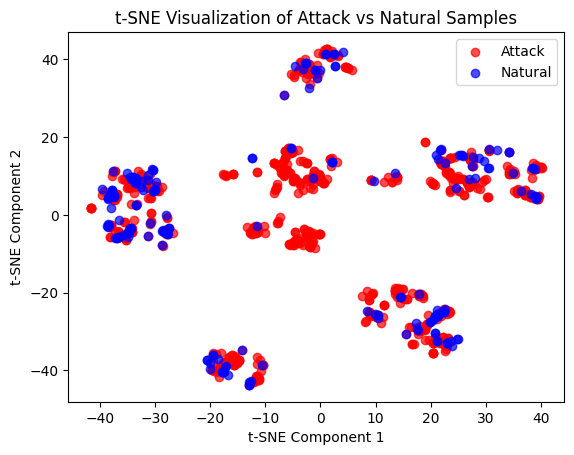

In [432]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_norm = normalize(tsne_data)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_norm.iloc[:, :116])
y = filtered_data['marker'].values
plt.scatter(X_tsne[y == "Attack", 0], X_tsne[y == "Attack", 1],
            c='red', label="Attack", alpha=0.7)
plt.scatter(X_tsne[y == "Natural", 0], X_tsne[y == "Natural", 1],
            c='blue', label="Natural", alpha=0.7)

plt.title("t-SNE Visualization of Attack vs Natural Samples")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()
